In [9]:
#Bayesian classification
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    name="car",
    version=1,
    as_frame=True,
    return_X_y=True
)

df = X.copy()
df["class"] = y

df["buying"]   = df["buying"].map({"low":0, "med":1, "high":2, "vhigh":3})
df["maint"]    = df["maint"].map({"low":0, "med":1, "high":2, "vhigh":3})
df["doors"]    = df["doors"].map({"2":2, "3":3, "4":4, "5more":5})
df["persons"]  = df["persons"].map({"2":2, "4":4, "more":5})
df["lug_boot"] = df["lug_boot"].map({"small":0, "med":1, "big":2})
df["safety"]   = df["safety"].map({"low":0, "med":1, "high":2})

df["target"] = df["class"].map({
    "unacc": 0,
    "acc": 1,
    "good": 2,
    "vgood": 3
})

X = df.drop(columns=["class", "target"])
y = df["target"]

imputer = SimpleImputer(strategy="most_frequent")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

gnb = GaussianNB()
gnb.fit(X_tr, y_tr)

y_pred = gnb.predict(X_te)

print("Accuracy:", accuracy_score(y_te, y_pred))
print("\nClassification Report:\n", classification_report(y_te, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_te, y_pred))


sample = ["vhigh", "high", "4", "more", "big", "high"]

sample[0] = {"low":0, "med":1, "high":2, "vhigh":3}[sample[0]]
sample[1] = {"low":0, "med":1, "high":2, "vhigh":3}[sample[1]]
sample[2] = {"2":2, "3":3, "4":4, "5more":5}[sample[2]]
sample[3] = {"2":2, "4":4, "more":5}[sample[3]]
sample[4] = {"small":0, "med":1, "big":2}[sample[4]]
sample[5] = {"low":0, "med":1, "high":2}[sample[5]]

sample = imputer.transform([sample])
sample = scaler.transform(sample)

pred = gnb.predict(sample)[0]

labels = {0:"Unacceptable", 1:"Acceptable", 2:"Good", 3:"Very Good"}
print("Sample Prediction:", labels[pred])


/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset car is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://openml.org/data/v1/download/21/car.arff
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Accuracy: 0.7523148148148148

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       303
           1       0.53      0.34      0.42        96
           2       0.00      0.00      0.00        17
           3       0.25      1.00      0.41        16

    accuracy                           0.75       432
   macro avg       0.42      0.56      0.43       432
weighted avg       0.76      0.75      0.75       432

Confusion Matrix:
 [[276  20   0   7]
 [ 27  33   3  33]
 [  1   9   0   7]
 [  0   0   0  16]]
Sample Prediction: Acceptable


/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset car is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://openml.org/data/v1/download/21/car.arff
  warn(


Accuracy: 0.9675925925925926

Classification Report:
               precision    recall  f1-score   support

Unacceptable       0.98      0.99      0.98       303
  Acceptable       0.93      0.93      0.93        96
        Good       0.94      0.88      0.91        17
   Very Good       1.00      0.94      0.97        16

    accuracy                           0.97       432
   macro avg       0.96      0.93      0.95       432
weighted avg       0.97      0.97      0.97       432

Confusion Matrix:
 [[299   4   0   0]
 [  6  89   1   0]
 [  0   2  15   0]
 [  0   1   0  15]]


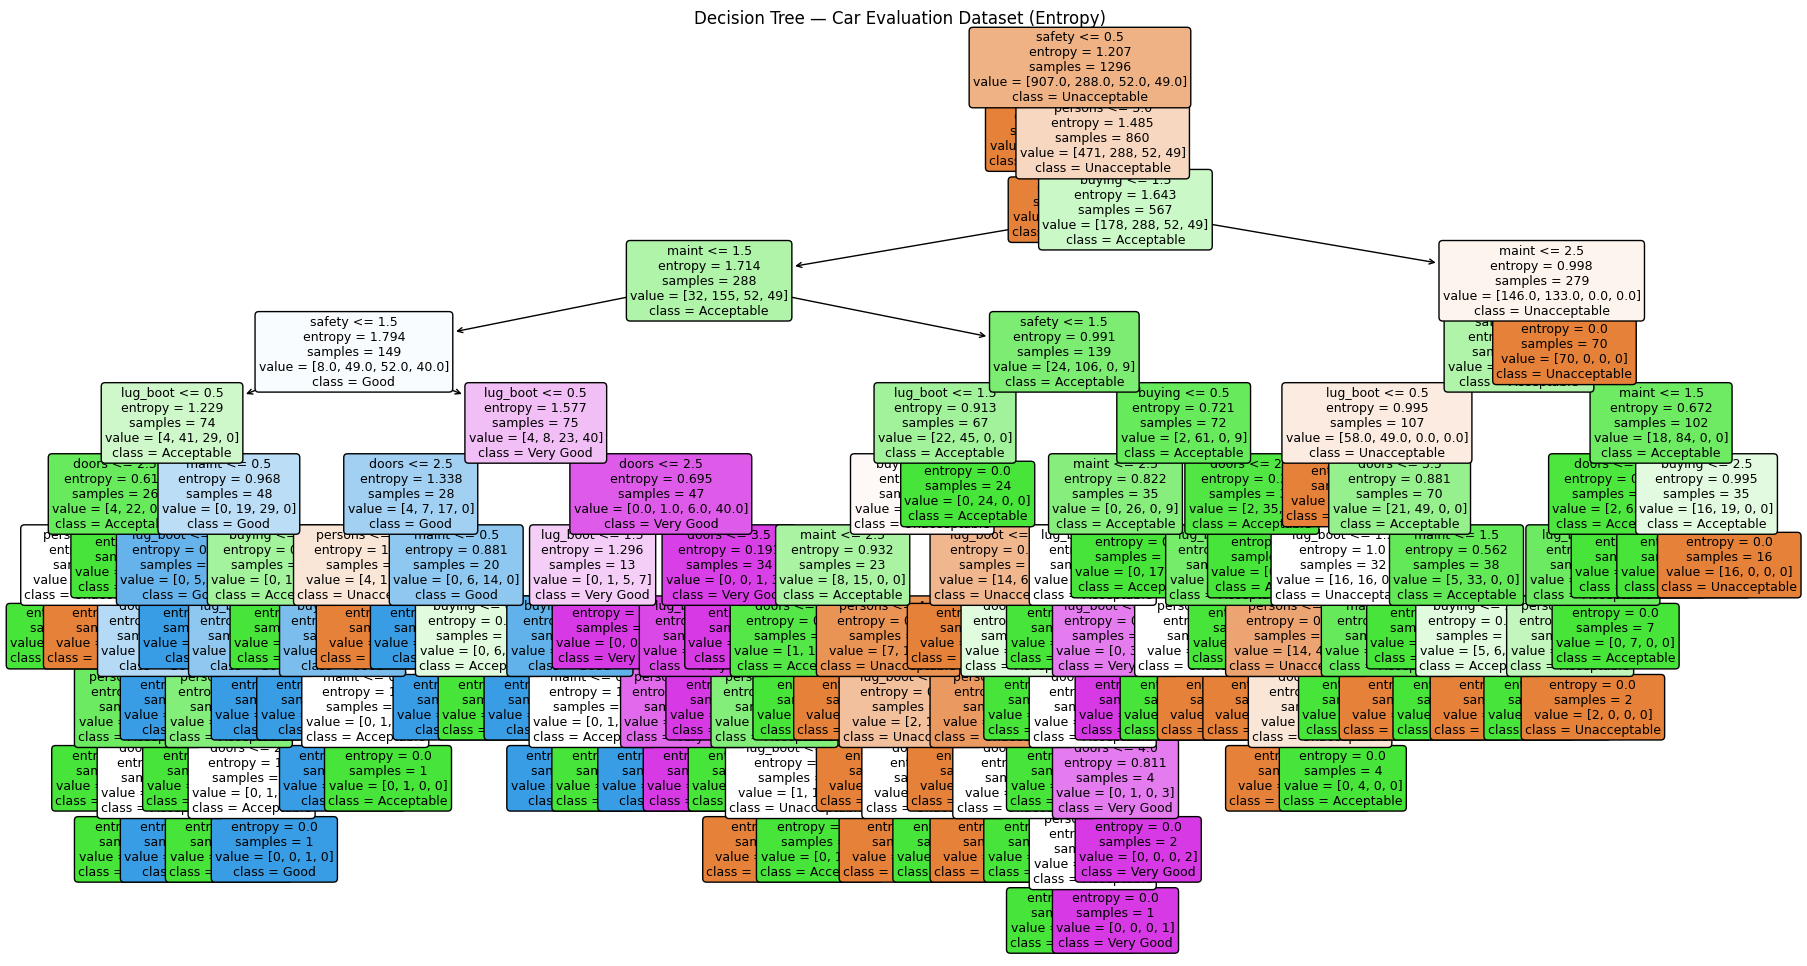


Sample Prediction: Unacceptable


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml

# 1) Load dataset
X, y = fetch_openml(
    name="car",
    version=1,
    as_frame=True,
    return_X_y=True
)

df = X.copy()
df["class"] = y

# 2) Encode categorical features
df["buying"]   = df["buying"].map({"low":0, "med":1, "high":2, "vhigh":3})
df["maint"]    = df["maint"].map({"low":0, "med":1, "high":2, "vhigh":3})
df["doors"]    = df["doors"].map({"2":2, "3":3, "4":4, "5more":5})
df["persons"]  = df["persons"].map({"2":2, "4":4, "more":5})
df["lug_boot"] = df["lug_boot"].map({"small":0, "med":1, "big":2})
df["safety"]   = df["safety"].map({"low":0, "med":1, "high":2})

# 3) Encode target
df["target"] = df["class"].map({
    "unacc": 0,
    "acc": 1,
    "good": 2,
    "vgood": 3
})

# 4) Features & target
feature_names = ["buying","maint","doors","persons","lug_boot","safety"]
X = df[feature_names]
y = df["target"]

# 5) Handle missing values
imputer = SimpleImputer(strategy="most_frequent")
X_imputed = imputer.fit_transform(X)

# 6) Train-test split
X_tr, X_te, y_tr, y_te = train_test_split(
    X_imputed, y, test_size=0.25, random_state=42, stratify=y
)

# 7) Train Decision Tree
clf = DecisionTreeClassifier(
    criterion="entropy",
    random_state=0,
    max_depth=None,
    min_samples_leaf=1
)
clf.fit(X_tr, y_tr)

# 8) Evaluation
y_pred = clf.predict(X_te)
print("Accuracy:", accuracy_score(y_te, y_pred))
print("\nClassification Report:\n", classification_report(
    y_te, y_pred,
    target_names=["Unacceptable","Acceptable","Good","Very Good"]
))
print("Confusion Matrix:\n", confusion_matrix(y_te, y_pred))

# 9) Plot the Decision Tree
plt.figure(figsize=(22, 12))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=["Unacceptable","Acceptable","Good","Very Good"],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Decision Tree — Car Evaluation Dataset (Entropy)")
plt.show()

# 10) Sample prediction
sample = ["vhigh", "high", "4", "more", "big", "high"]

sample[0] = {"low":0,"med":1,"high":2,"vhigh":3}[sample[0]]
sample[1] = {"low":0,"med":1,"high":2,"vhigh":3}[sample[1]]
sample[2] = {"2":2,"3":3,"4":4,"5more":5}[sample[2]]
sample[3] = {"2":2,"4":4,"more":5}[sample[3]]
sample[4] = {"small":0,"med":1,"big":2}[sample[4]]
sample[5] = {"low":0,"med":1,"high":2}[sample[5]]

sample = imputer.transform([sample])
pred = clf.predict(sample)[0]

labels = {0:"Unacceptable", 1:"Acceptable", 2:"Good", 3:"Very Good"}
print("\nSample Prediction:", labels[pred])


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml

# 1) Load Car Evaluation dataset
X, y = fetch_openml(
    name="car",
    version=1,
    as_frame=True,
    return_X_y=True
)

df = X.copy()
df["class"] = y

# 2) Encode categorical features (same style as 'thal')
df["buying"]   = df["buying"].map({"low":0, "med":1, "high":2, "vhigh":3})
df["maint"]    = df["maint"].map({"low":0, "med":1, "high":2, "vhigh":3})
df["doors"]    = df["doors"].map({"2":2, "3":3, "4":4, "5more":5})
df["persons"]  = df["persons"].map({"2":2, "4":4, "more":5})
df["lug_boot"] = df["lug_boot"].map({"small":0, "med":1, "big":2})
df["safety"]   = df["safety"].map({"low":0, "med":1, "high":2})

# 3) Encode target
df["target"] = df["class"].map({
    "unacc": 0,
    "acc": 1,
    "good": 2,
    "vgood": 3
})

# 4) Features / target
X = df.drop(columns=["class", "target"])
y = df["target"]

# 5) Handle missing values
imputer = SimpleImputer(strategy="most_frequent")
X_imputed = imputer.fit_transform(X)

# 6) Scale features (IMPORTANT for ANN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 7) Train-test split
X_tr, X_te, y_tr, y_te = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

# 8) Train ANN (MLP)
mlp = MLPClassifier(
    hidden_layer_sizes=(20, 10),  # 2 hidden layers
    activation='relu',
    max_iter=1000,
    random_state=42
)
mlp.fit(X_tr, y_tr)

# 9) Evaluation
y_pred = mlp.predict(X_te)

print("Accuracy:", accuracy_score(y_te, y_pred))
print("\nClassification Report:\n", classification_report(
    y_te, y_pred,
    target_names=["Unacceptable", "Acceptable", "Good", "Very Good"]
))
print("Confusion Matrix:\n", confusion_matrix(y_te, y_pred))

# 10) Sample prediction
sample = ["vhigh", "high", "4", "more", "big", "high"]

sample[0] = {"low":0, "med":1, "high":2, "vhigh":3}[sample[0]]
sample[1] = {"low":0, "med":1, "high":2, "vhigh":3}[sample[1]]
sample[2] = {"2":2, "3":3, "4":4, "5more":5}[sample[2]]
sample[3] = {"2":2, "4":4, "more":5}[sample[3]]
sample[4] = {"small":0, "med":1, "big":2}[sample[4]]
sample[5] = {"low":0, "med":1, "high":2}[sample[5]]

sample = imputer.transform([sample])
sample = scaler.transform(sample)

pred = mlp.predict(sample)[0]

labels = {0:"Unacceptable", 1:"Acceptable", 2:"Good", 3:"Very Good"}
print("\nSample Prediction:", labels[pred])


/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset car is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://openml.org/data/v1/download/21/car.arff
  warn(


Accuracy: 0.9884259259259259

Classification Report:
               precision    recall  f1-score   support

Unacceptable       1.00      0.99      1.00       303
  Acceptable       0.97      0.99      0.98        96
        Good       1.00      0.88      0.94        17
   Very Good       0.94      1.00      0.97        16

    accuracy                           0.99       432
   macro avg       0.98      0.97      0.97       432
weighted avg       0.99      0.99      0.99       432

Confusion Matrix:
 [[301   2   0   0]
 [  1  95   0   0]
 [  0   1  15   1]
 [  0   0   0  16]]

Sample Prediction: Unacceptable


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
